In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('pune.csv')

In [3]:
df.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2008-12-11 00:00:00,30,18,0.0,11.0,6,93,04:33 PM,05:13 AM,06:57 AM,...,10,31,72,0.0,1013,18,10,114,5,pune
1,2008-12-11 01:00:00,30,18,0.0,11.0,6,93,04:33 PM,05:13 AM,06:57 AM,...,9,30,72,0.0,1013,19,10,125,4,pune
2,2008-12-11 02:00:00,30,18,0.0,11.0,6,93,04:33 PM,05:13 AM,06:57 AM,...,8,29,72,0.0,1013,18,10,136,4,pune
3,2008-12-11 03:00:00,30,18,0.0,11.0,6,93,04:33 PM,05:13 AM,06:57 AM,...,8,29,72,0.0,1013,18,10,147,4,pune
4,2008-12-11 04:00:00,30,18,0.0,11.0,6,93,04:33 PM,05:13 AM,06:57 AM,...,7,23,68,0.0,1014,20,10,136,4,pune


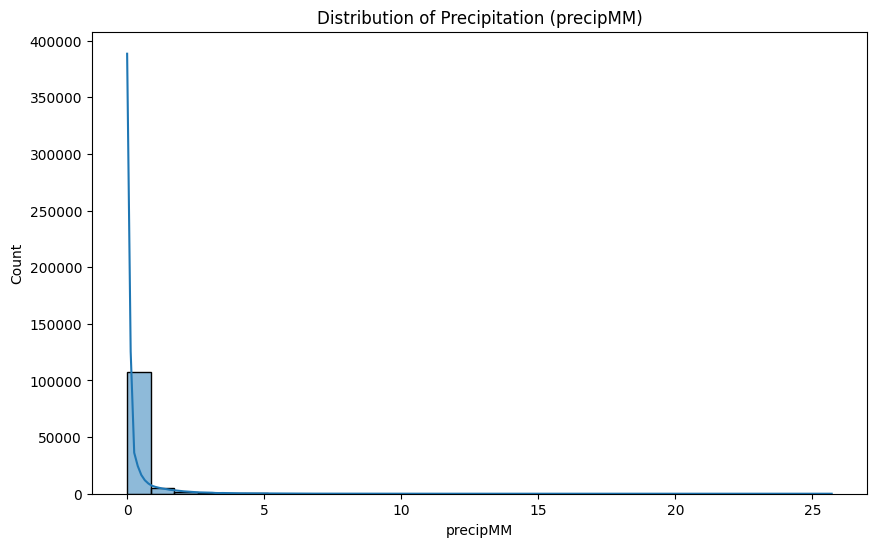

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['precipMM'], bins=30, kde=True)
plt.title('Distribution of Precipitation (precipMM)')
plt.show()

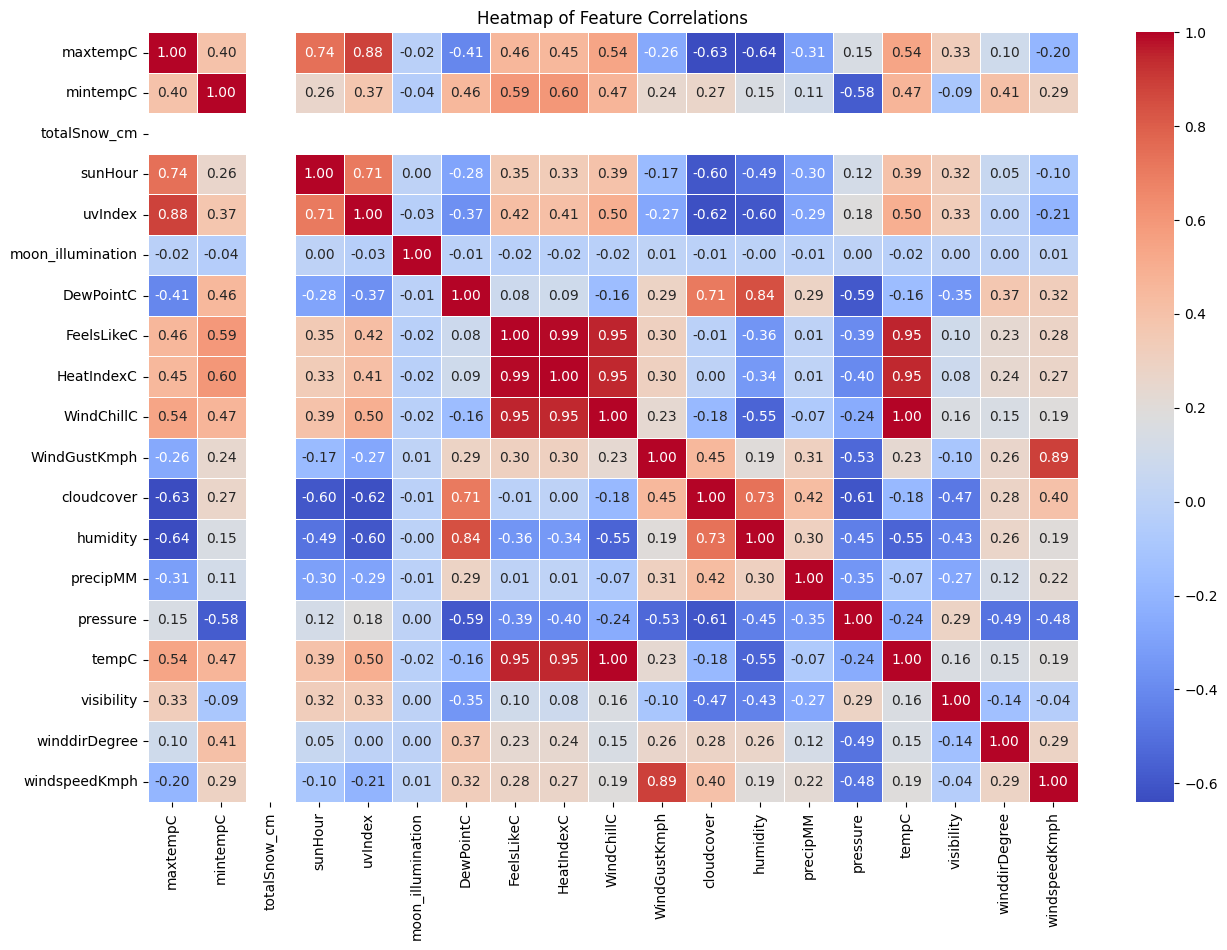

In [5]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])  # Only keep numeric columns for correlation

plt.figure(figsize=(15, 10))
correlation_matrix = df_numeric.corr()  # Correlation for numeric features only
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

In [9]:
df_processed = df.drop(columns=['moonrise', 'moonset', 'sunrise', 'sunset', 'location', 'moon_illumination','FeelsLikeC','HeatIndexC','WindChillC','tempC','winddirDegree','totalSnow_cm'])


In [10]:
df_processed.head()

,date_time,maxtempC,mintempC,sunHour,uvIndex,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,windspeedKmph
0,2008-12-11 00:00:00,30,18,11.0,6,13,10,31,72,0.0,1013,10,5
1,2008-12-11 01:00:00,30,18,11.0,6,14,9,30,72,0.0,1013,10,4
2,2008-12-11 02:00:00,30,18,11.0,6,13,8,29,72,0.0,1013,10,4
3,2008-12-11 03:00:00,30,18,11.0,6,13,8,29,72,0.0,1013,10,4
4,2008-12-11 04:00:00,30,18,11.0,6,13,7,23,68,0.0,1014,10,4


In [15]:
df_processed['date_time'] = pd.to_datetime(df_processed['date_time'])

# Extract day and month from 'date_time' column
df_processed['day'] = df_processed['date_time'].dt.day
df_processed['month'] = df_processed['date_time'].dt.month
df_processed['hour'] = df_processed['date_time'].dt.hour


# Display the first few rows to verify the new columns
display(df_processed.head())

,date_time,maxtempC,mintempC,sunHour,uvIndex,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,windspeedKmph,day,month,hour
0,2008-12-11 00:00:00,30,18,11.0,6,13,10,31,72,0.0,1013,10,5,11,12,0
1,2008-12-11 01:00:00,30,18,11.0,6,14,9,30,72,0.0,1013,10,4,11,12,1
2,2008-12-11 02:00:00,30,18,11.0,6,13,8,29,72,0.0,1013,10,4,11,12,2
3,2008-12-11 03:00:00,30,18,11.0,6,13,8,29,72,0.0,1013,10,4,11,12,3
4,2008-12-11 04:00:00,30,18,11.0,6,13,7,23,68,0.0,1014,10,4,11,12,4


In [16]:
df_processed.to_csv('final_processed_dataset.csv',index = False)